#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
##Lección 3 - Redes neuronales de un capa

A continuación la clase de la red neuronal de una capa (que se explicó en clase)

In [1]:
import numpy as np

# Funciones de activación
def linear(z, derivate=False):
    if derivate:
        da = np.ones(z.shape)
        return z, da
    else:
        return z

def sigmoid(z, derivate=False):
    a = 1 / (1 + np.exp(-z))
    if derivate:
        da = a * (1 - a) 
        return a, da
    return a

def tanh(z, derivate=False):
    a = np.tanh(z)
    if derivate:
        da = (1 + a) * (1 - a)
        return a, da
    return a

def relu(z, derivate=False):
    a = z * (z >= 0)
    if derivate:
        da = np.array(z >= 0, float) 
        return a, da
    return a

def softmax(z, derivate=False):
    e = np.exp(z - np.max(z, axis=0))
    a = e / np.sum(e, axis=0)
    if derivate:
        da = np.ones(z.shape, float)
        return a, da
    return a
    

class OLnetwork:
    def __init__(self, n_input, n_output, act_func, learning_rate=0.1):
        self.eta = learning_rate
        self.w = 1 - 2 * np.random.rand(n_output, n_input)
        self.b = 1 - 2 * np.random.rand(n_output, 1)
        self.f = act_func
        
    def predict(self, X):
        Z = self.w @ X + self.b
        Yest = self.f(Z)
        return Yest
    
    def fit(self, X, Y, epochs=50):
        #Calcular número de muestras
        p = X.shape[1]
        
        # Iterar por cada época
        for _ in range(epochs):
            # Iterar por cada muestra
            for i in range(p):
                
                # Sacar muestra
                x = X[:,i].reshape(-1, 1)
                y = Y[:,i].reshape(-1, 1) 
                
                # Propagar muestra
                Z = self.w @ x + self.b
                Yest, dy = self.f(Z, derivate=True)
        
                #Entrenar
                lg = (y-Yest) * dy
                self.w += self.eta * lg @ x.T
                self.b += self.eta * lg

Les dejo también está función para que puedan dibujar en su actividad

In [17]:
import matplotlib.pyplot as plt

def plot_data(X, Y, net):
    dot_c = ('r.', 'g.', 'b.', 'k.')
    lin_c = ('r-', 'g-', 'b-', 'k-')
    for i in range(X.shape[1]):
        c = np.argmax(Y[:,i])
        plt.plot(X[0,i], X[1,i], dot_c[c])
    
    for i in range(4):    
        w1, w2, b = net.w[i,0], net.w[i,1], net.b[i]
        plt.plot([-0, 1],[(-b/w2),(1/w2)*(-w1-b)], lin_c[i])   
    
    plt.xlim([0,1])
    plt.ylim([0,1])

def plot_data_softmax(X, Y, net):
    dot_c = ('r.', 'g.', 'b.', 'k.')
    lin_c = ('r-', 'g-', 'b-', 'k-')
    for i in range(X.shape[1]):
        c = np.argmax(Y[:,i])
        plt.plot(X[0,i], X[1,i], dot_c[c])

    for i in range(4):
        w1, w2, b = net.w[i, 0], net.w[i, 1], net.b[i]
        plt.plot([-0, 1],[(-b/w2),(1/w2)*(-w1-b)], lin_c[i])

    plt.xlim([0,1])
    plt.ylim([0,1])

Cargamos los datos de entrada y estimados

In [3]:
import pandas as pd

df = pd.read_csv('./DataSets/Dataset_A03.csv')
X = np.asanyarray(df[['x1','x2']]).T
Y = np.asanyarray(df.drop(columns=['x1', 'x2'])).T
print(X.shape)
print(Y.shape)

(2, 160)
(4, 160)


Creamos la neurona de una sola capa, la entrenamos, la ejecutamos y mostramos gráfica resultante

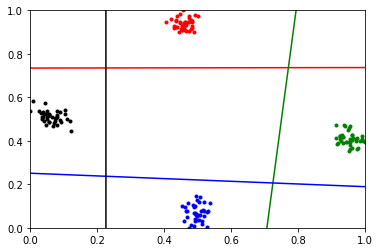

In [7]:
net = OLnetwork(X.shape[0], Y.shape[0], sigmoid, 0.1)

net.fit(X, Y)

net.predict(X)

plot_data(X, Y, net)

Probamos la función Softmax

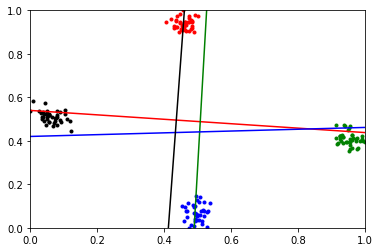

In [18]:
netSoftmax = OLnetwork(X.shape[0], Y.shape[0], softmax, 0.1)

netSoftmax.fit(X, Y)

netSoftmax.predict(X)

plot_data_softmax(X, Y, netSoftmax)